In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd

# Use the 'error_bad_lines=False' argument to skip problematic lines
df = pd.read_csv('/content/actual_dataset.csv', on_bad_lines='skip')

# Alternatively, you can specify a different delimiter if it's not a comma
# df = pd.read_csv('/content/kaggle.csv', sep=';')  # If the delimiter is a semicolon

df.head(7)

<ipython-input-1-b72904a2b0de>:4: DtypeWarning: Columns (36,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/actual_dataset.csv', on_bad_lines='skip')


,Airport_Code,Amenity,Astronomical_Twilight,Bump,Calculation1,City,Civil_Twilight,count of Bump,Count of Crossing,count Traffic Signal,...,Humidity(%),Number of Records,Precipitation(in),Pressure(in),Records,Start_Lat,Start_Lng,TMC,Wind_Chill(F),Wind_Speed(mph)
0,NaN,False,Day,False,Remaining,Garnet Valley,Day,0,0,0,...,NaN,1.0,NaN,NaN,1.0,39.852940,-75.461739,201.0,NaN,NaN
1,KDWH,False,Day,False,Remaining,Spring,Day,0,0,0,...,82.0,1.0,NaN,30.02,1.0,30.159246,-95.510826,201.0,NaN,5.8
2,KDSM,False,Day,False,Remaining,West des Moines,Day,0,0,0,...,79.0,1.0,NaN,30.04,1.0,41.586887,-93.806496,201.0,34.3,11.5
3,KCPS,False,Day,False,Remaining,Saint Louis,Day,0,0,0,...,84.0,1.0,NaN,30.10,1.0,38.634579,-90.186806,201.0,NaN,12.7
4,KXBP,False,Day,False,Remaining,Springtown,Day,0,0,0,...,96.0,1.0,NaN,29.95,1.0,32.930958,-97.641068,201.0,NaN,5.8
5,KRND,False,Day,False,Remaining,Universal City,Day,0,0,0,...,73.0,1.0,NaN,30.00,1.0,29.561666,-98.308411,201.0,NaN,11.5
6,KFWS,False,Day,False,Remaining,Kennedale,Day,0,0,0,...,94.0,1.0,NaN,29.86,1.0,32.656605,-97.228271,201.0,NaN,13.8


['Garnet Valley' 'Spring' 'West des Moines' ... 'Birmingham' 'Birmingham'
 'Jemison']


In [ ]:
df.shape

(99735, 46)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99735 entries, 0 to 99734
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     99735 non-null  object 
 1   Source                 99735 non-null  object 
 2   Severity               99735 non-null  int64  
 3   Start_Time             99735 non-null  object 
 4   End_Time               99735 non-null  object 
 5   Start_Lat              99735 non-null  float64
 6   Start_Lng              99735 non-null  float64
 7   End_Lat                55567 non-null  float64
 8   End_Lng                55567 non-null  float64
 9   Distance(mi)           99735 non-null  float64
 10  Description            99735 non-null  object 
 11  Street                 99601 non-null  object 
 12  City                   99735 non-null  object 
 13  County                 99735 non-null  object 
 14  State                  99735 non-null  object 
 15  Zi

In [2]:
df['Severity'].value_counts()

,count
Severity,
2,16068
3,276
1,96
4,2
0,1


In [2]:
dfdup=df.copy()

In [ ]:
dfdup.isnull().sum()

,0
ID,0
Source,0
Severity,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
End_Lat,44168
End_Lng,44168
Distance(mi),0


drop unwanted features

Droping unwanted features We are going to drop the following features:

ID, Source: since they dont carry any information for the severity

TMC: because it could already contains information about the accident severity

Start_Time: because it was decomposed by the time features added before (day, month, weekday)

End_Time: beause we cannot know in advance when the traffic flow will become regular again

Start_Lat, Start_Lng, End_Lat, End_Lng: beause we cannot know latitude and longitude

Description: most description only report the name of the road of the accident, and so we decided to omit this feature

Number, Street, County, State, Zipcode, Country: because we just focus on the City where the accident happened

Timezone, Airport_Code, Weather_Timestamp, Wind_Chill(F): because they are not useful for our task

Turning_Loop: since its always false

Sunrise_Sunset, Nautical_Twilight, Astronomical_Twilight: because they are redundant

Amenity,Bump, Crossing, Give_Way, Junction, No_Exit, Railway, Roundabout, Station, Stop, Traffic_Calming, Traffic_Signal: because most of the values are false.

In [ ]:
features = ["ID", "Source", "TMC", "Start_Time", "End_Time", "End_Lat", "End_Lng", "Description", "Number",
            "Street", "County", "State", "Zipcode", "Country", "Timezone", "Airport_Code", "Weather_Timestamp",
            "Wind_Chill(F)", "Turning_Loop", "Sunrise_Sunset", "Nautical_Twilight", "Astronomical_Twilight",
            "Start_Lat","Start_Lng","Amenity","Bump", "Crossing", "Give_Way", "Junction", "No_Exit", "Railway",
            "Roundabout", "Station", "Stop",
            "Traffic_Calming", "Traffic_Signal"]

# Check which features exist in the DataFrame
existing_features = [f for f in features if f in dfdup.columns]

# Drop only the existing features
dfdup = dfdup.drop(existing_features, axis=1)

'features = ["ID", "Source", "TMC", "Start_Time", "End_Time", "End_Lat", "End_Lng", "Description", "Number",\n            "Street", "County", "State", "Zipcode", "Country", "Timezone", "Airport_Code", "Weather_Timestamp",\n            "Wind_Chill(F)", "Turning_Loop", "Sunrise_Sunset", "Nautical_Twilight", "Astronomical_Twilight",\n            "Start_Lat","Start_Lng","Amenity","Bump", "Crossing", "Give_Way", "Junction", "No_Exit", "Railway",\n            "Roundabout", "Station", "Stop",\n            "Traffic_Calming", "Traffic_Signal"]\n\n# Check which features exist in the DataFrame\nexisting_features = [f for f in features if f in dfdup.columns]\n\n# Drop only the existing features\ndfdup = dfdup.drop(existing_features, axis=1)'

In [ ]:
dfdup.drop(['ID', 'Source', 'Street', 'County', 'State', 'Zipcode', 'Country','Sunrise_Sunset', 'Nautical_Twilight','Astronomical_Twilight'],axis=1, inplace=True)

In [ ]:
dfdup.isnull().sum()

,0
Severity,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
End_Lat,44168
End_Lng,44168
Distance(mi),0
Description,0
City,0


In [ ]:
missing_values = dfdup.isnull().sum()
percentage_missing = (missing_values / len(dfdup)) * 100
print(percentage_missing)

Severity              0.000000
Start_Time            0.000000
End_Time              0.000000
Start_Lat             0.000000
Start_Lng             0.000000
End_Lat              44.285356
End_Lng              44.285356
Distance(mi)          0.000000
Description           0.000000
City                  0.000000
Timezone              0.111295
Airport_Code          0.294781
Weather_Timestamp     1.515015
Temperature(F)        2.096556
Wind_Chill(F)        25.614879
Humidity(%)           2.237931
Pressure(in)          1.757658
Visibility(mi)        2.280042
Wind_Direction        2.209856
Wind_Speed(mph)       7.314383
Precipitation(in)    28.441370
Weather_Condition     2.249962
Amenity               0.001003
Bump                  0.001003
Crossing              0.001003
Give_Way              0.001003
Junction              0.001003
No_Exit               0.001003
Railway               0.001003
Roundabout            0.001003
Station               0.001003
Stop                  0.001003
Traffic_

In [ ]:
dfdup['End_Lng'].fillna(dfdup['End_Lng'].mean(), inplace=True)
dfdup['End_Lat'].fillna(dfdup['End_Lat'].mean(), inplace=True)
dfdup['Precipitation(in)'].fillna(dfdup['Precipitation(in)'].mean(), inplace=True)
dfdup['Temperature(F)'].fillna(dfdup['Temperature(F)'].mean(), inplace=True)
dfdup['Visibility(mi)'].fillna(dfdup['Visibility(mi)'].mean(), inplace=True)
dfdup['Humidity(%)'].fillna(dfdup['Humidity(%)'].mean(), inplace=True)
dfdup['Pressure(in)'].fillna(dfdup['Pressure(in)'].mean(), inplace=True)
dfdup['Wind_Speed(mph)'].fillna(dfdup['Wind_Speed(mph)'].mean(), inplace=True)
dfdup['Wind_Chill(F)'].fillna(dfdup['Wind_Chill(F)'].mean(), inplace=True)
dfdup.dropna(subset=['City'], inplace=True)
dfdup.dropna(subset=['Civil_Twilight'], inplace=True)
dfdup.dropna(subset=['Weather_Condition'], inplace=True)
dfdup.dropna(subset=['Wind_Direction'], inplace=True)


<ipython-input-14-398b7e3a432e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfdup['End_Lng'].fillna(dfdup['End_Lng'].mean(), inplace=True)
<ipython-input-14-398b7e3a432e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [ ]:
dfdup.isnull().sum()

,0
Severity,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
End_Lat,0
End_Lng,0
Distance(mi),0
Description,0
City,0


In [ ]:
dfdup['Severity'].value_counts()

,count
Severity,
2,77191
3,16243
4,2480
1,821


In [ ]:
dfdup.shape

(96735, 36)

# outlier handing

In [ ]:
import numpy as np
df_num_features=dfdup.select_dtypes(include=np.number)

In [ ]:
Q1 = df_num_features.quantile(0.25)
Q3 = df_num_features.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Severity              0.000000
Start_Lat             6.709825
Start_Lng            36.863950
End_Lat               2.214958
End_Lng              10.217110
Distance(mi)          0.457000
Temperature(F)       27.000000
Wind_Chill(F)        20.000000
Humidity(%)          36.000000
Pressure(in)          0.670000
Visibility(mi)        0.000000
Wind_Speed(mph)       5.000000
Precipitation(in)     0.008317
dtype: float64


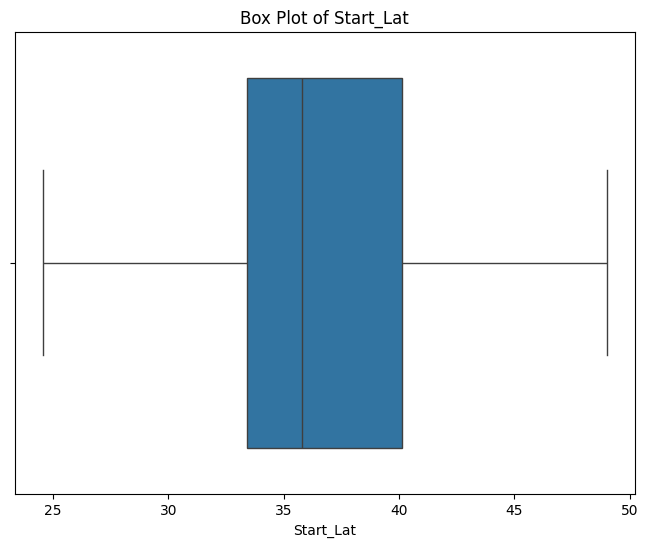

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dfdup['Start_Lat'] = np.where((dfdup['Start_Lat'] > 60), np.nan, dfdup['Start_Lat'])
dfdup.dropna(subset=['Start_Lat'], inplace=True)


plt.figure(figsize=(8, 6))
sns.boxplot(x=dfdup['Start_Lat'])
plt.title('Box Plot of Start_Lat')
plt.show()

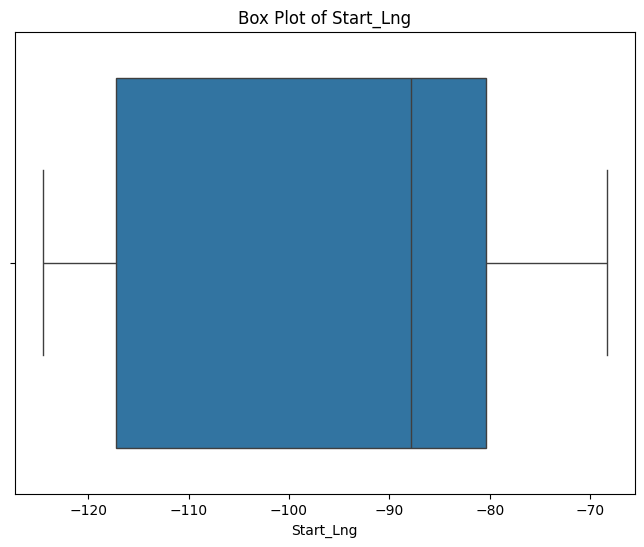

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dfdup['Start_Lng'] = np.where((dfdup['Start_Lng'] > 60), np.nan, dfdup['Start_Lng'])
dfdup.dropna(subset=['Start_Lng'], inplace=True)


plt.figure(figsize=(8, 6))
sns.boxplot(x=dfdup['Start_Lng'])
plt.title('Box Plot of Start_Lng')
plt.show()

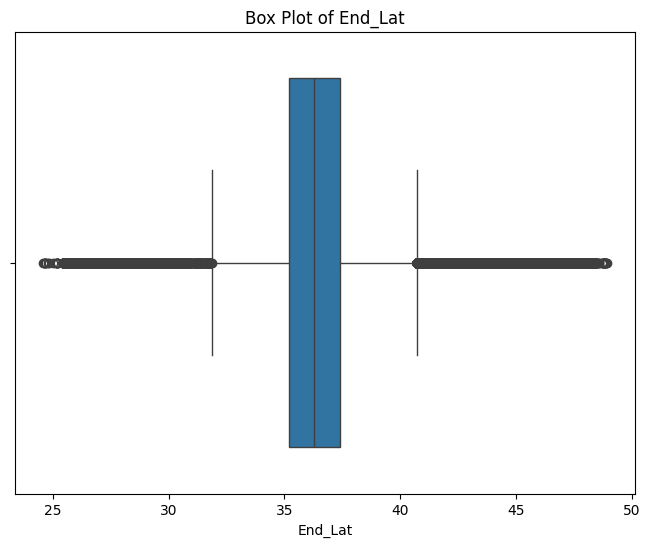

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dfdup['End_Lat'] = np.where((dfdup['End_Lat'] > 60), np.nan, dfdup['End_Lat'])
dfdup.dropna(subset=['End_Lat'], inplace=True)


plt.figure(figsize=(8, 6))
sns.boxplot(x=dfdup['End_Lat'])
plt.title('Box Plot of End_Lat')
plt.show()

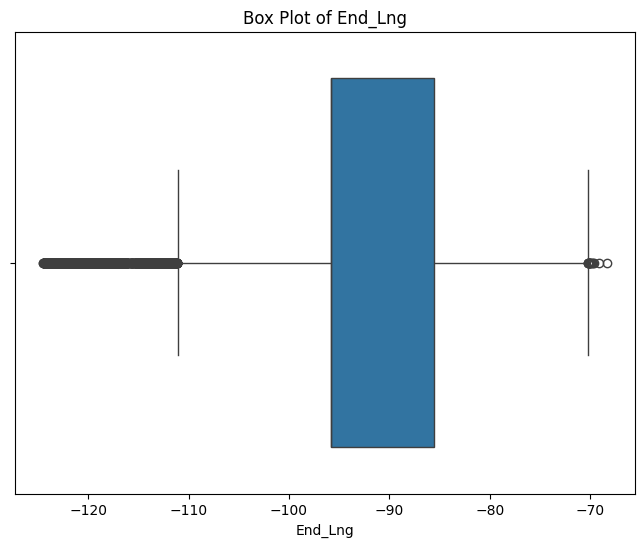

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dfdup['End_Lng'] = np.where((dfdup['End_Lng'] > 60), np.nan, dfdup['End_Lng'])
dfdup.dropna(subset=['End_Lng'], inplace=True)


plt.figure(figsize=(8, 6))
sns.boxplot(x=dfdup['End_Lng'])
plt.title('Box Plot of End_Lng')
plt.show()

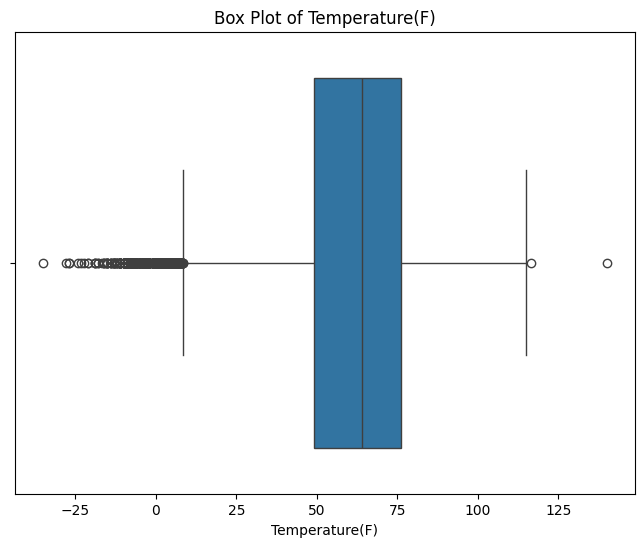

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Replace the parentheses in the column name with an underscore
dfdup['Temperature(F)'] = np.where((dfdup['Temperature(F)'] > 150), np.nan, dfdup['Temperature(F)'])
dfdup.dropna(subset=['Temperature(F)'], inplace=True)

plt.figure(figsize=(8, 6))
sns.boxplot(x=dfdup['Temperature(F)'])
plt.title('Box Plot of Temperature(F)')
plt.show()

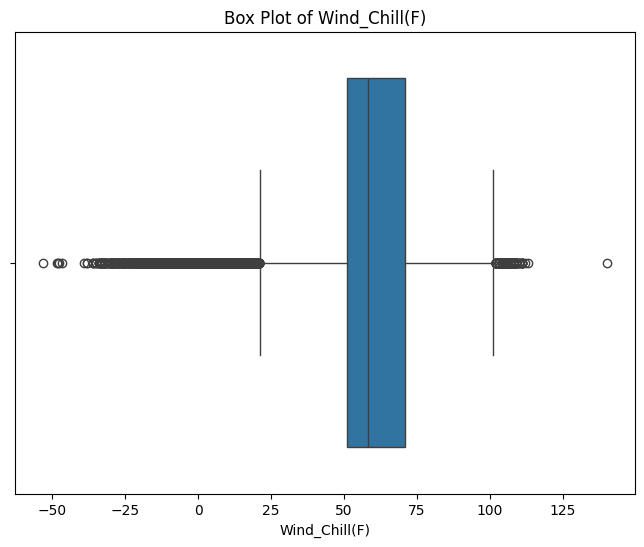

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=(8, 6))
sns.boxplot(x=dfdup['Wind_Chill(F)'])
plt.title('Box Plot of Wind_Chill(F)')
plt.show()

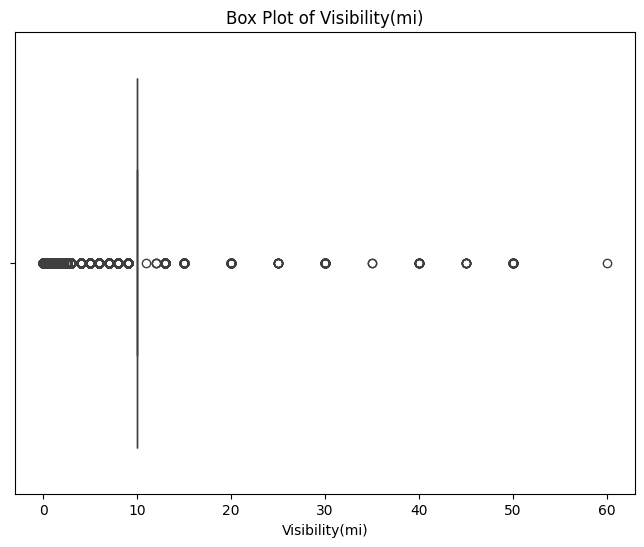

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dfdup['Visibility(mi)'] = np.where((dfdup['Visibility(mi)'] > 60), np.nan, dfdup['Visibility(mi)'])
dfdup.dropna(subset=['Visibility(mi)'], inplace=True)


plt.figure(figsize=(8, 6))
sns.boxplot(x=dfdup['Visibility(mi)'])
plt.title('Box Plot of Visibility(mi)')
plt.show()

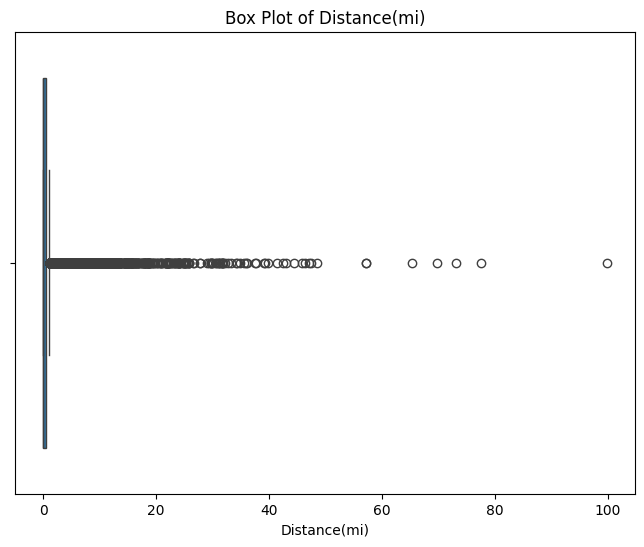

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dfdup['Distance(mi)'] = np.where((dfdup['Distance(mi)'] > 100), np.nan, dfdup['Distance(mi)'])
dfdup.dropna(subset=['Distance(mi)'], inplace=True)


plt.figure(figsize=(8, 6))
sns.boxplot(x=dfdup['Distance(mi)'])
plt.title('Box Plot of Distance(mi)')
plt.show()

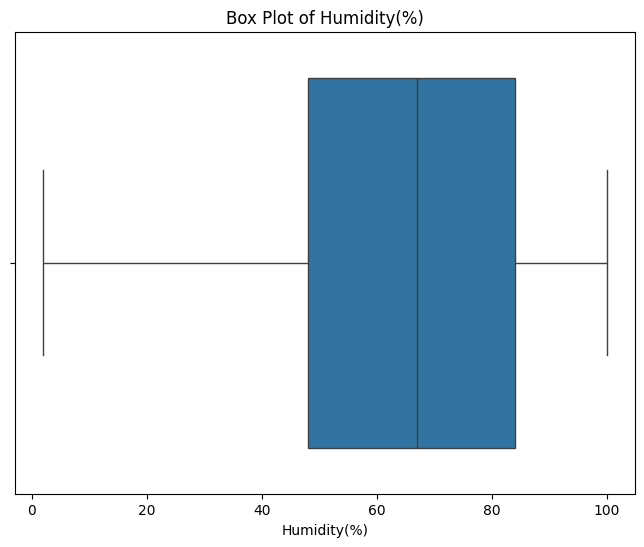

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.boxplot(x=dfdup['Humidity(%)'])
plt.title('Box Plot of Humidity(%)')
plt.show()

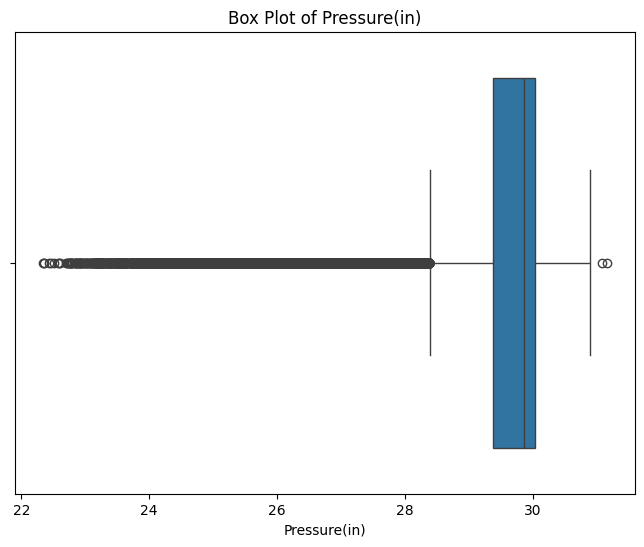

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dfdup['Pressure(in)'] = np.where((dfdup['Pressure(in)'] < 22), np.nan, dfdup['Pressure(in)'])
dfdup.dropna(subset=['Pressure(in)'], inplace=True)


plt.figure(figsize=(8, 6))
sns.boxplot(x=dfdup['Pressure(in)'])
plt.title('Box Plot of Pressure(in)')
plt.show()

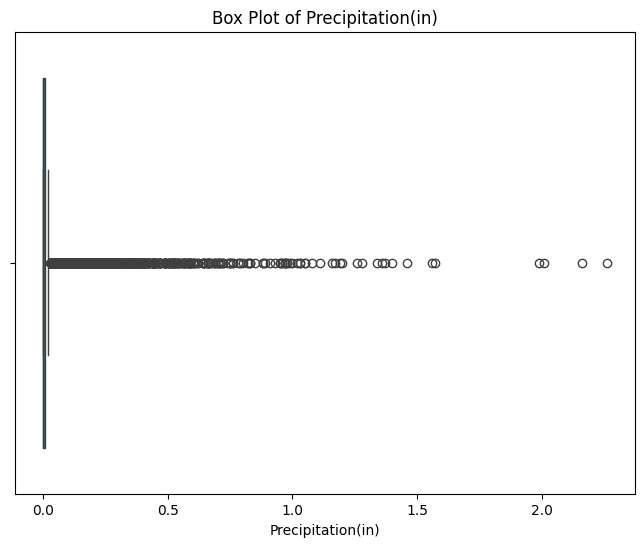

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dfdup['Precipitation(in)'] = np.where((dfdup['Precipitation(in)'] > 5), np.nan, dfdup['Precipitation(in)'])
dfdup.dropna(subset=['Precipitation(in)'], inplace=True)

plt.figure(figsize=(8, 6))
sns.boxplot(x=dfdup['Precipitation(in)'])
plt.title('Box Plot of Precipitation(in)')
plt.show()

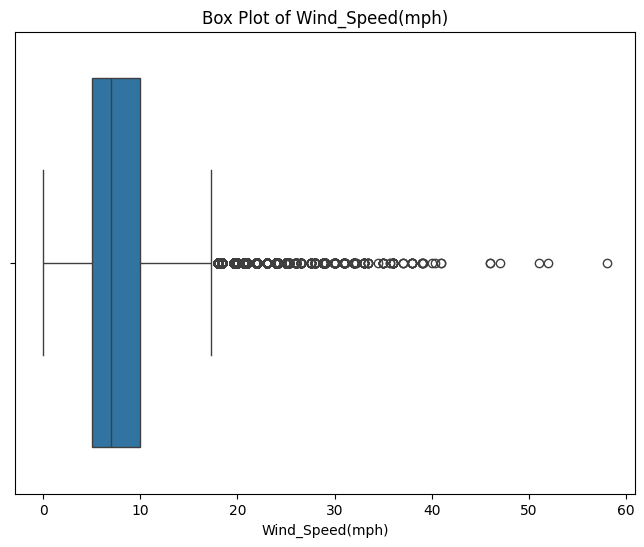

In [ ]:
dfdup['Wind_Speed(mph)'] = np.where((dfdup['Wind_Speed(mph)'] > 150), np.nan, dfdup['Wind_Speed(mph)'])
dfdup.dropna(subset=['Wind_Speed(mph)'], inplace=True)
dfdup['Wind_Speed(mph)'] = np.where((dfdup['Wind_Speed(mph)'] > 100), np.nan, dfdup['Wind_Speed(mph)'])
dfdup.dropna(subset=['Wind_Speed(mph)'], inplace=True)
plt.figure(figsize=(8, 6))
sns.boxplot(x=dfdup['Wind_Speed(mph)'])
plt.title('Box Plot of Wind_Speed(mph)')
plt.show()

In [4]:
dfdup['Severity'].value_counts()

,count
Severity,
2,5392
1,45
3,41


# Handling class imbalance

Text(0, 0.5, 'Count')

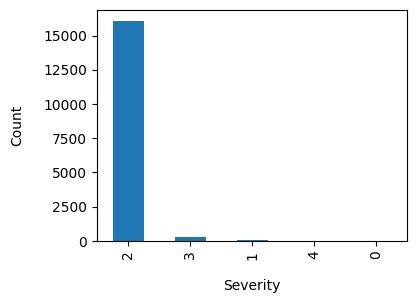

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Severity'].value_counts().plot(kind='bar',figsize=(4,3))
plt.xlabel("Severity",labelpad=14)
plt.ylabel("Count",labelpad=14)


In [6]:
from imblearn.over_sampling import RandomOverSampler

X = dfdup.drop('Severity', axis=1)
y = dfdup['Severity']
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)
df = pd.concat([X_res, y_res], axis=1)

Text(0, 0.5, 'Count')

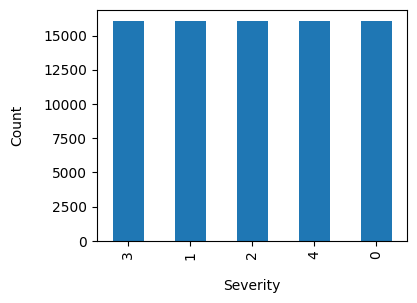

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

dfdup['Severity'].value_counts().plot(kind='bar',figsize=(4,3))
plt.xlabel("Severity",labelpad=14)
plt.ylabel("Count",labelpad=14)


In [ ]:
dfdup.shape

(308484, 36)

In [ ]:
dfdup['Severity'].value_counts()

,count
Severity,
2,77121
3,77121
4,77121
1,77121


# Identifying trends and patterns

In [ ]:
import pandas as pd


# Find categorical features
categorical_features = dfdup.select_dtypes(include=['object', 'category']).columns.tolist()

print("Categorical Features:", categorical_features)


Categorical Features: ['Start_Time', 'End_Time', 'Description', 'City', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Wind_Direction', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Civil_Twilight']


KeyboardInterrupt: 

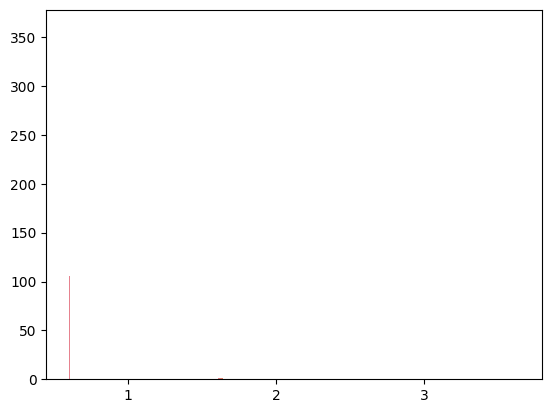

In [ ]:
sns.countplot(data=dfdup,x='Severity', hue='Start_Time')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

<Axes: xlabel='Severity', ylabel='count'>

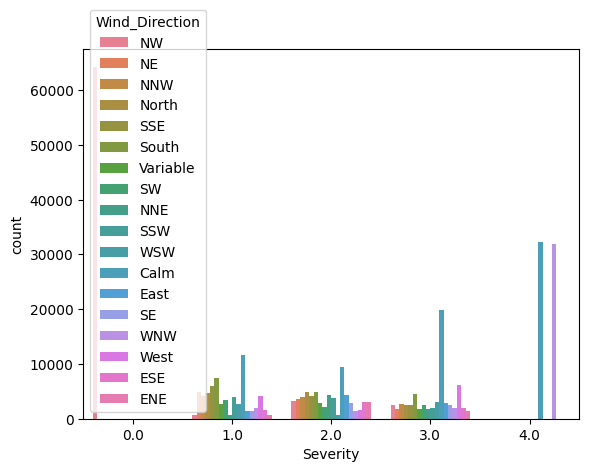

In [ ]:
sns.countplot(data=dfdup,x='Severity', hue='Wind_Direction')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

<Axes: xlabel='Severity', ylabel='count'>

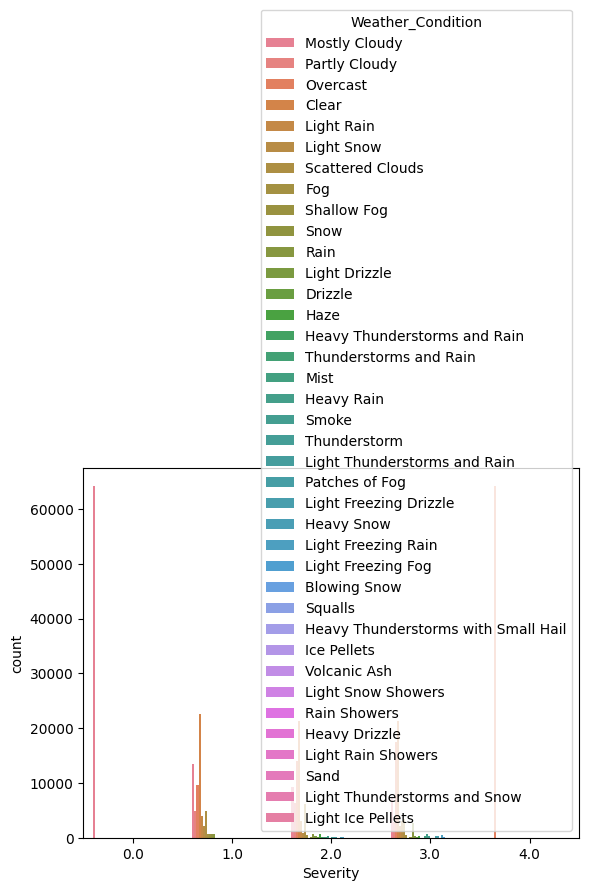

In [ ]:
sns.countplot(data=dfdup,x='Severity', hue='Weather_Condition')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Severity', ylabel='count'>

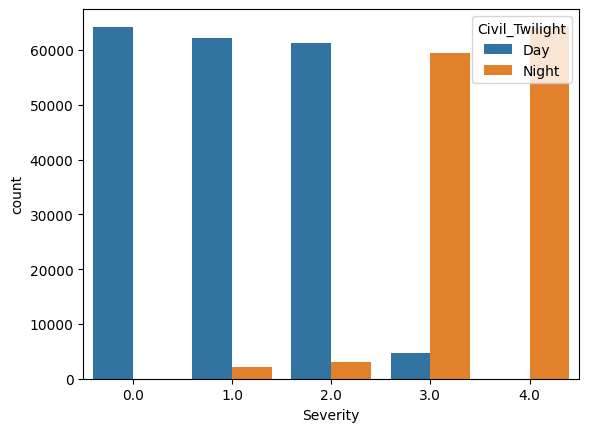

In [ ]:
sns.countplot(data=dfdup,x='Severity', hue='Civil_Twilight')

In [ ]:
import pandas as pd
import numpy as np

# Assuming your DataFrame is named 'dfdup'
numerical_features = dfdup.select_dtypes(include=np.number).columns.tolist()

# Print the list of numerical features
print(numerical_features)


['Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Severity']


<Axes: >

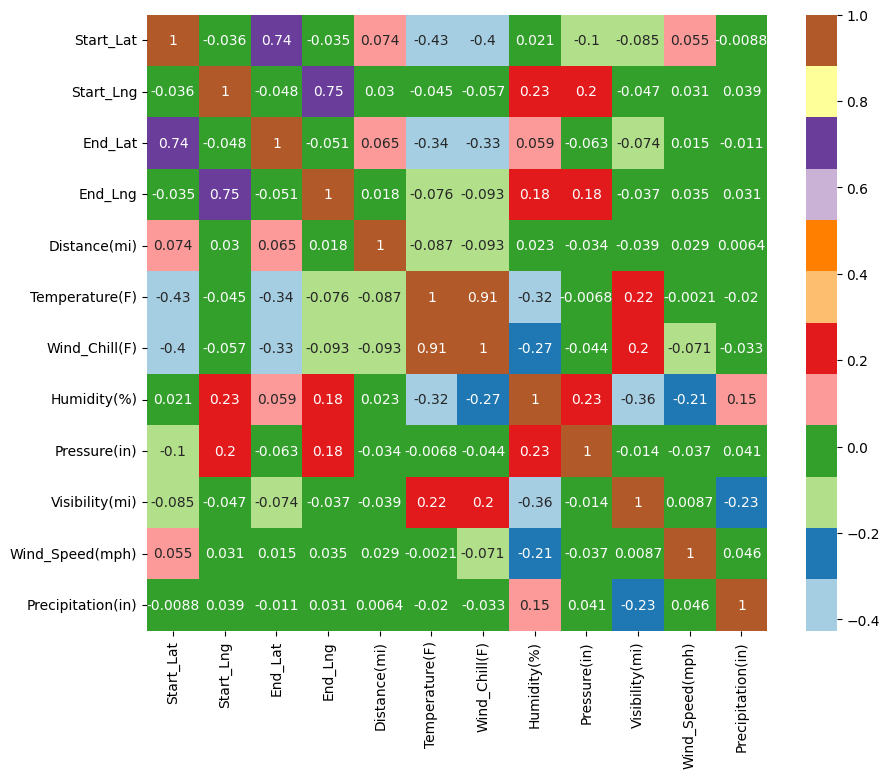

In [ ]:
new_df=dfdup.drop(columns=dfdup.drop(columns=['Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']))
plt.figure(figsize=(10,8))  # Set the size of the plot
sns.heatmap(new_df.corr(),cmap="Paired",annot=True)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

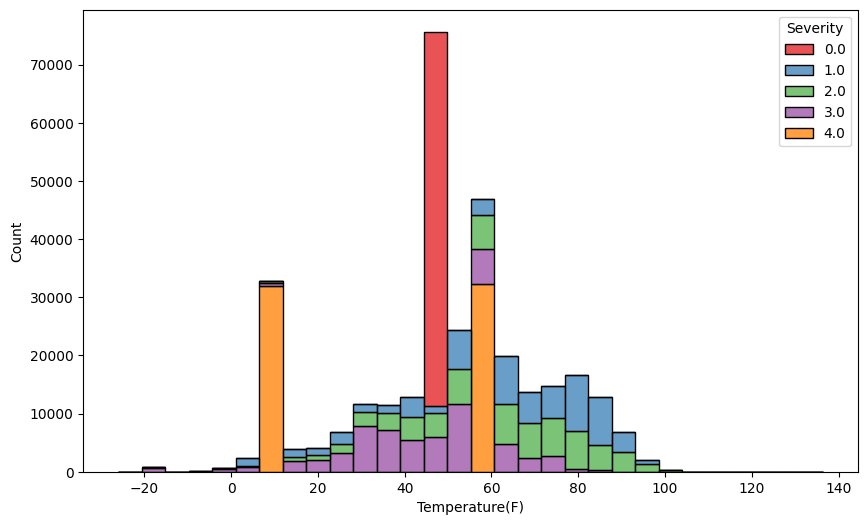

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dfdup, x='Temperature(F)', hue='Severity', multiple='stack', palette='Set1', bins=30)

plt.xlabel('Temperature(F)')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

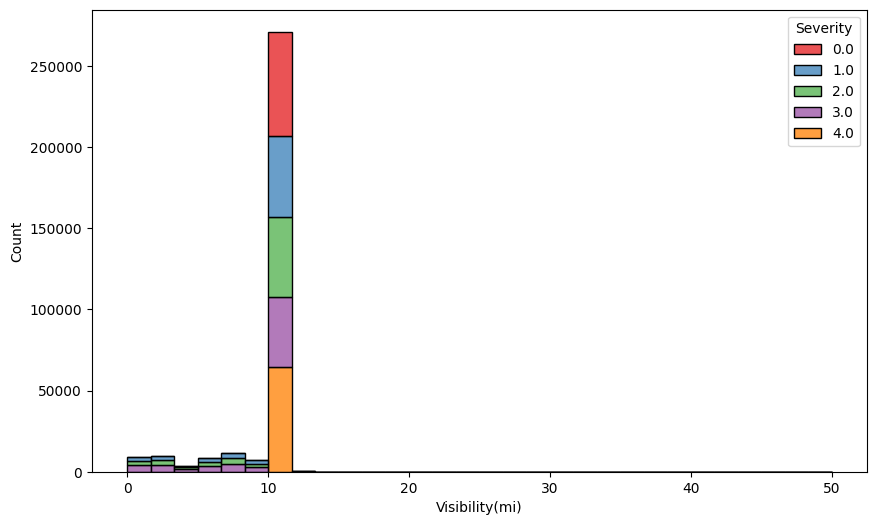

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dfdup, x='Visibility(mi)', hue='Severity', multiple='stack', palette='Set1', bins=30)

plt.xlabel('Visibility(mi)')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

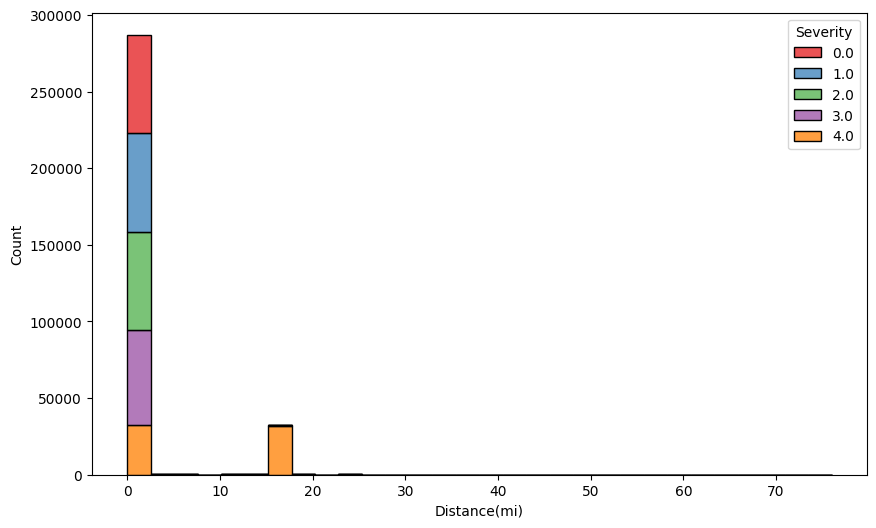

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dfdup, x='Distance(mi)', hue='Severity', multiple='stack', palette='Set1', bins=30)

plt.xlabel('Distance(mi)')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

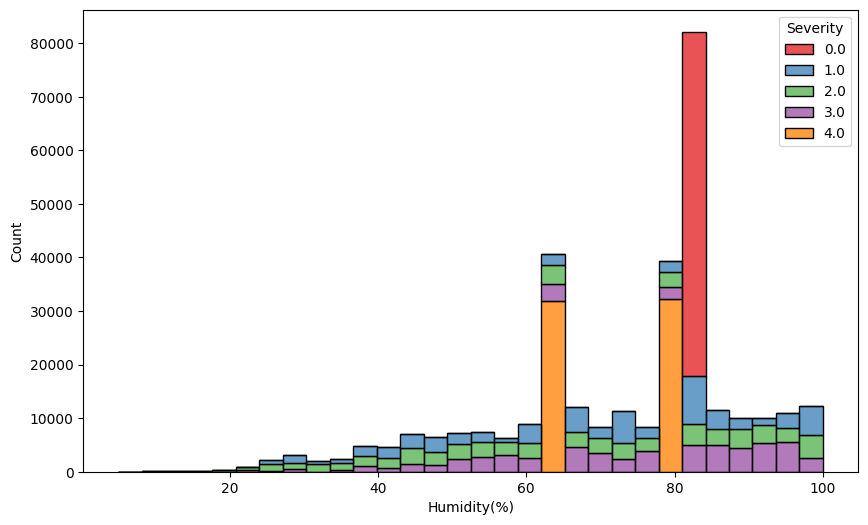

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dfdup, x='Humidity(%)', hue='Severity', multiple='stack', palette='Set1', bins=30)

plt.xlabel('Humidity(%)')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

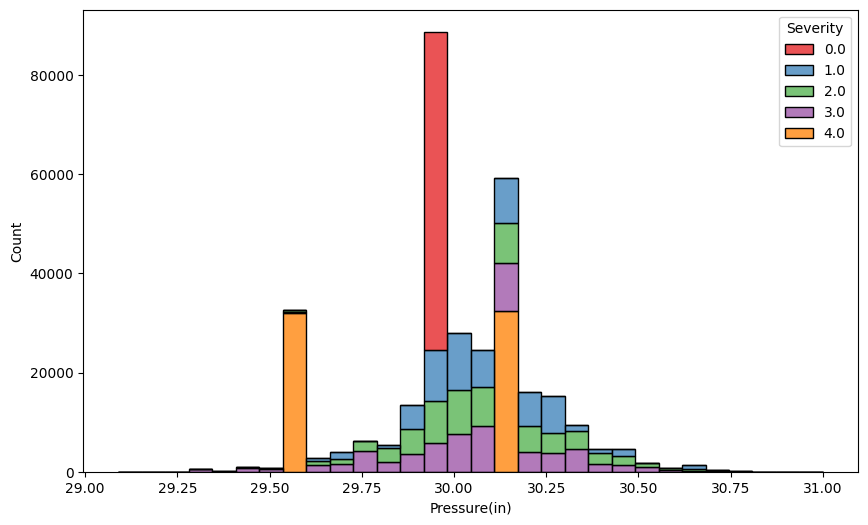

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dfdup, x='Pressure(in)', hue='Severity', multiple='stack', palette='Set1', bins=30)

plt.xlabel('Pressure(in)')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

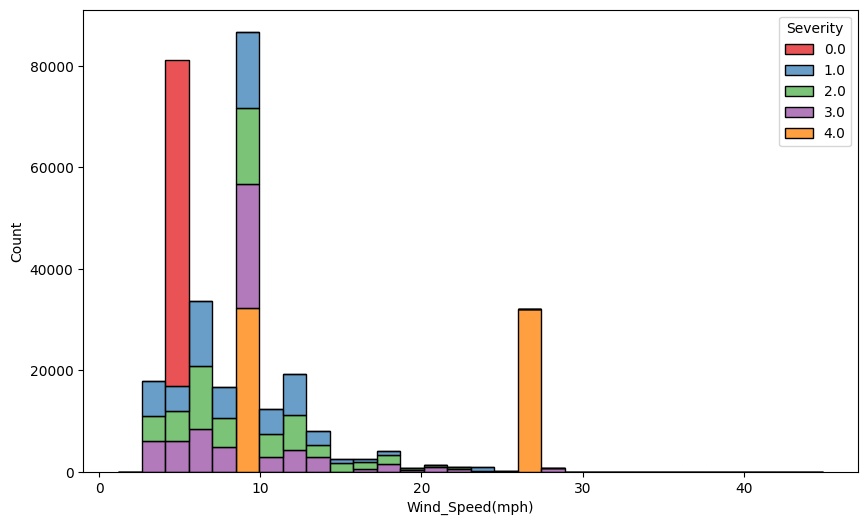

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dfdup, x='Wind_Speed(mph)', hue='Severity', multiple='stack', palette='Set1', bins=30)

plt.xlabel('Wind_Speed(mph)')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

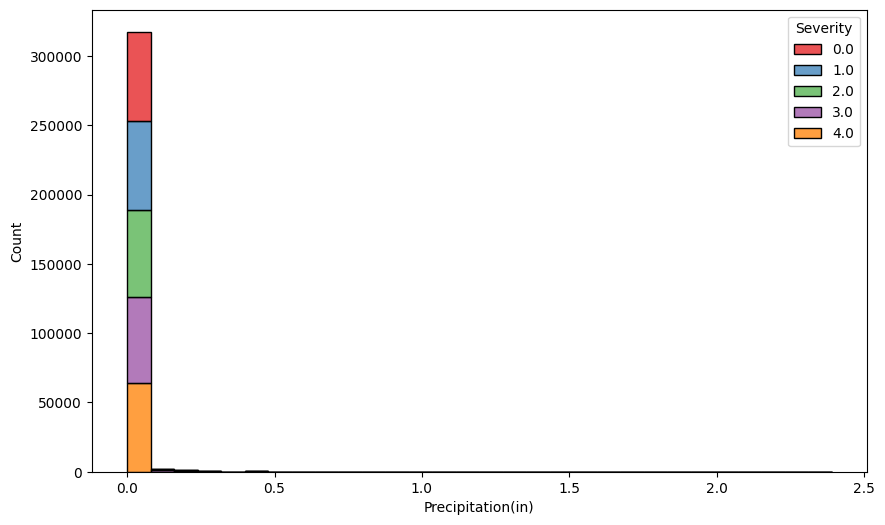

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dfdup, x='Precipitation(in)', hue='Severity', multiple='stack', palette='Set1', bins=30)

plt.xlabel('Precipitation(in)')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Temperature(F)', ylabel='Distance(mi)'>

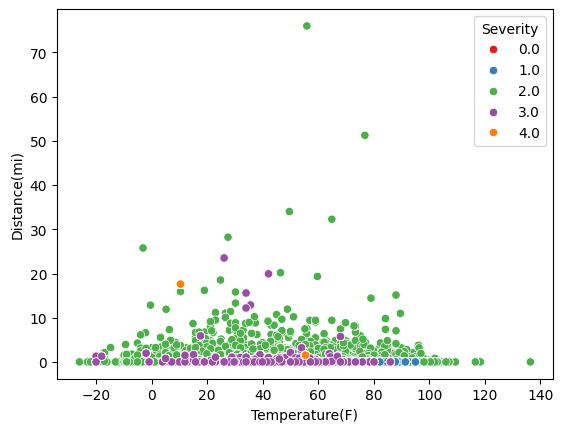

In [ ]:
sns.scatterplot(data=dfdup, x='Temperature(F)', y='Distance(mi)', hue='Severity',palette='Set1')
# The column name for Distance likely has units associated with it. Try "Distance(mi)"

<Axes: xlabel='Temperature(F)', ylabel='Wind_Speed(mph)'>

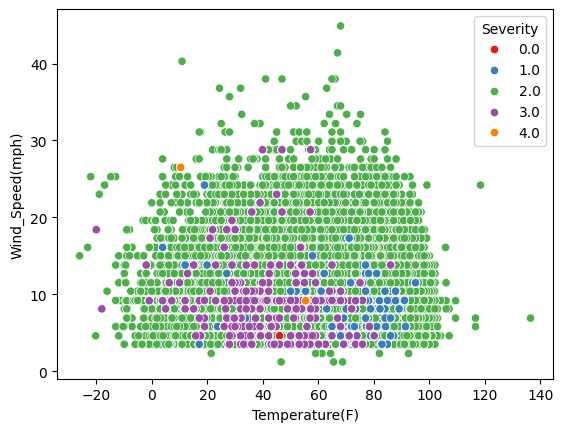

In [ ]:
sns.scatterplot(data=dfdup, x='Temperature(F)', y='Wind_Speed(mph)', hue='Severity',palette='Set1')
# The column name for Distance likely has units associated with it. Try "Distance(mi)"

<Axes: xlabel='Temperature(F)', ylabel='Humidity(%)'>

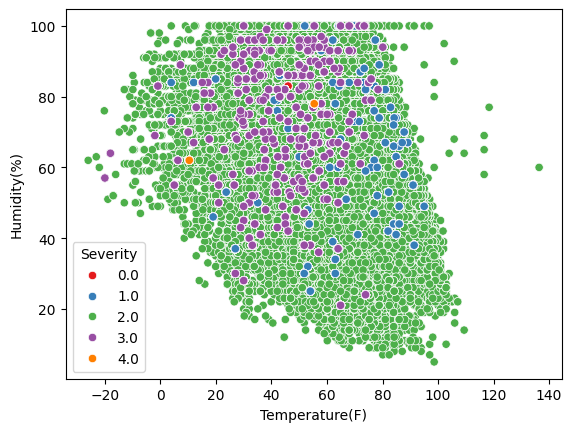

In [ ]:
sns.scatterplot(data=dfdup, x='Temperature(F)', y='Humidity(%)', hue='Severity',palette='Set1')

<Axes: xlabel='Visibility(mi)', ylabel='Humidity(%)'>

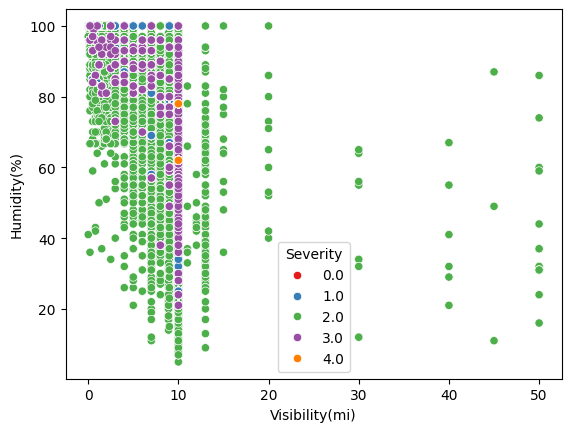

In [ ]:
sns.scatterplot(data=dfdup, x='Visibility(mi)', y='Humidity(%)', hue='Severity',palette='Set1')

<Axes: xlabel='Wind_Speed(mph)', ylabel='Pressure(in)'>

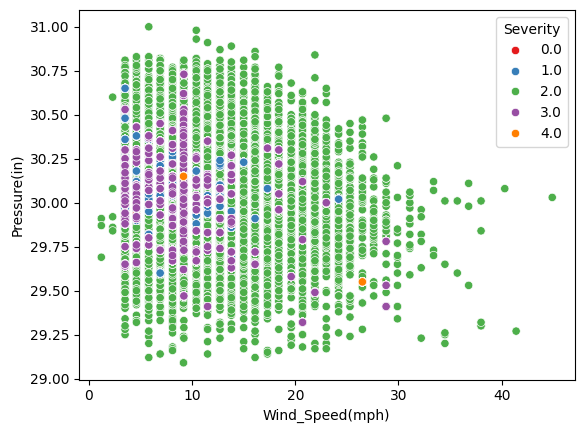

In [ ]:
sns.scatterplot(data=dfdup, x='Wind_Speed(mph)', y='Pressure(in)', hue='Severity',palette='Set1')

<Axes: xlabel='Wind_Speed(mph)', ylabel='Temperature(F)'>

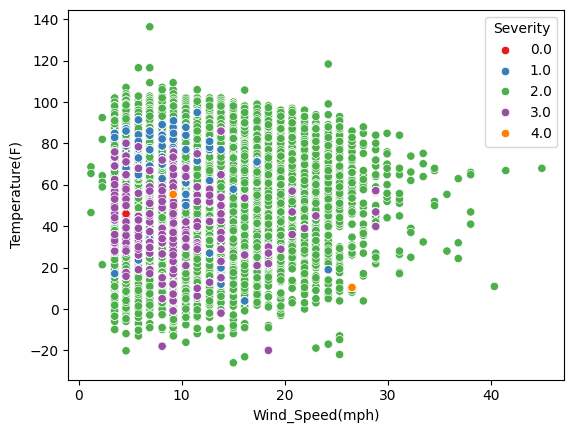

In [ ]:
sns.scatterplot(data=dfdup, x='Wind_Speed(mph)', y='Temperature(F)', hue='Severity',palette='Set1')

<Axes: xlabel='Distance(mi)', ylabel='Pressure(in)'>

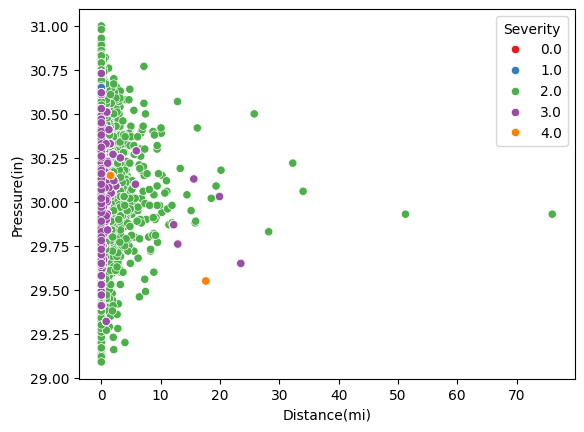

In [ ]:
sns.scatterplot(data=dfdup, x='Distance(mi)', y='Pressure(in)', hue='Severity',palette='Set1')

# Saving dataset

In [ ]:
dfdup.to_csv("ExploredDf.csv")

# Feature selection

In [ ]:
dfdup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308484 entries, 0 to 308483
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Start_Time         308484 non-null  object 
 1   End_Time           308484 non-null  object 
 2   Start_Lat          308484 non-null  float64
 3   Start_Lng          308484 non-null  float64
 4   End_Lat            308484 non-null  float64
 5   End_Lng            308484 non-null  float64
 6   Distance(mi)       308484 non-null  float64
 7   Description        308484 non-null  object 
 8   City               308484 non-null  object 
 9   Timezone           308484 non-null  object 
 10  Airport_Code       308484 non-null  object 
 11  Weather_Timestamp  308484 non-null  object 
 12  Temperature(F)     308484 non-null  float64
 13  Wind_Chill(F)      308484 non-null  float64
 14  Humidity(%)        308484 non-null  float64
 15  Pressure(in)       308484 non-null  float64
 16  Vi

In [ ]:
dfdup.head(7)

,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,City,Timezone,...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Civil_Twilight,Severity
0,12-06-2019 10:10,12-06-2019 10:55,30.641211,-91.153481,36.273650,-95.781042,0.000,Accident on LA-19 Baker-Zachary Hwy at Lower Z...,Zachary,US/Central,...,False,False,False,False,False,False,True,False,Day,2
1,37:14.0,56:53.0,38.990562,-77.399070,38.990037,-77.398282,0.056,Incident on FOREST RIDGE DR near PEPPERIDGE PL...,Sterling,US/Eastern,...,False,False,False,False,False,False,False,False,Night,2
2,13:00.0,22:45.0,34.661189,-120.492822,34.661189,-120.492442,0.022,Accident on W Central Ave from Floradale Ave t...,Lompoc,US/Pacific,...,False,False,False,False,False,False,True,False,Day,2
3,21-02-2022 17:43,21-02-2022 19:43,43.680592,-92.993317,43.680574,-92.972223,1.054,Incident on I-90 EB near REST AREA Drive with ...,Austin,US/Central,...,False,False,False,False,False,False,False,False,Day,2
4,04-12-2020 01:46,04-12-2020 04:13,35.395484,-118.985176,35.395476,-118.985995,0.046,RP ADV THEY LOCATED SUSP VEH OF 20002 - 726 CR...,Bakersfield,US/Pacific,...,False,False,False,False,False,False,False,False,Night,2
5,29-03-2021 07:03,29-03-2021 08:51,42.532082,-70.944267,36.273650,-95.781042,0.000,Accident on Forest St at Lowell St.,Peabody,US/Eastern,...,False,False,False,False,False,False,True,False,Day,2
6,14-01-2020 16:49,14-01-2020 20:49,42.421280,-123.119450,42.421280,-123.119450,0.000,At OR-99/Exit 45A - Accident.,Gold Hill,US/Pacific,...,False,False,False,False,False,False,False,False,Day,2


In [ ]:
dfdup.drop(['Start_Time','End_Time','Start_Lat','Start_Lng','End_Lat','End_Lng','Airport_Code','Junction    0.007787
21               Stop    0.004939
20            Station    0.002512
12            Amenity    0.001454
18            Railway    0.001045
15           Give_Way    0.001007
17            No_Exit    0.000488
22    Traffic_Calming    0.000Bump','Roundabout'],axis=1, inplace=True)

In [ ]:
dfdup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528268 entries, 0 to 528267
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Distance(mi)       528268 non-null  float64
 1   City               528268 non-null  object 
 2   Weather_Timestamp  528268 non-null  object 
 3   Temperature(F)     528268 non-null  float64
 4   Wind_Chill(F)      528268 non-null  float64
 5   Humidity(%)        528268 non-null  float64
 6   Pressure(in)       528268 non-null  float64
 7   Visibility(mi)     528268 non-null  float64
 8   Wind_Direction     528268 non-null  object 
 9   Wind_Speed(mph)    528268 non-null  float64
 10  Precipitation(in)  528268 non-null  float64
 11  Weather_Condition  528268 non-null  object 
 12  Amenity            528268 non-null  object 
 13  Bump               528268 non-null  object 
 14  Crossing           528268 non-null  object 
 15  Give_Way           528268 non-null  object 
 16  Ju

In [ ]:
from imblearn.over_sampling import RandomOverSampler

X = dfdup.drop('Severity', axis=1)
y = dfdup['Severity']
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)
dfdup = pd.concat([X_res, y_res], axis=1)

Text(0, 0.5, 'Count')

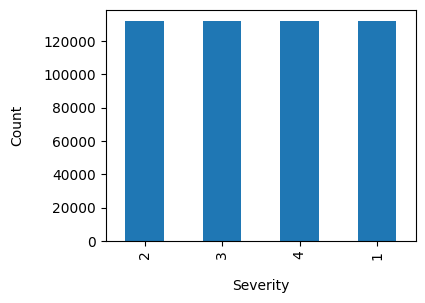

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

dfdup['Severity'].value_counts().plot(kind='bar',figsize=(4,3))
plt.xlabel("Severity",labelpad=14)
plt.ylabel("Count",labelpad=14)

In [ ]:
dfdup['Severity'].value_counts()

,count
Severity,
2,132067
3,132067
4,132067
1,132067


In [ ]:
dfdup.shape

(528268, 26)

In [ ]:

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
new_df=dfdup.copy()

# Display the first few rows of the dataset to understand its structure
print(new_df.head())
print(new_df.info())  # Check data types and missing values

# Step 1: Handle Missing Values
# Separate numerical and categorical columns
numerical_features = new_df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = new_df.select_dtypes(include=['object', 'category']).columns

# Impute missing values in numerical features with the mean
imputer_num = SimpleImputer(strategy='mean')
new_df[numerical_features] = imputer_num.fit_transform(new_df[numerical_features])

# Impute missing values in categorical features with the most frequent value
imputer_cat = SimpleImputer(strategy='most_frequent')
new_df[categorical_features] = imputer_cat.fit_transform(new_df[categorical_features])

# Step 2: Encode Categorical Features
# Method 1: Label Encoding for binary categorical features (or if order matters)
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    new_df[col] = le.fit_transform(new_df[col])
    label_encoders[col] = le


# Display the cleaned and fully numeric DataFrame
print(new_df.head())


   Distance(mi)         City Weather_Timestamp  Temperature(F)  Wind_Chill(F)  \
0         0.000      Zachary  12-06-2019 09:53            77.0           77.0   
1         0.056     Sterling  03-12-2022 23:52            45.0           43.0   
2         0.022       Lompoc  20-08-2022 12:56            68.0           68.0   
3         1.054       Austin  21-02-2022 17:35            27.0           15.0   
4         0.046  Bakersfield  04-12-2020 01:54            42.0           42.0   

   Humidity(%)  Pressure(in)  Visibility(mi) Wind_Direction  Wind_Speed(mph)  \
0         62.0         29.92            10.0             NW              5.0   
1         48.0         29.91            10.0              W              5.0   
2         73.0         29.79            10.0              W             13.0   
3         86.0         28.49            10.0            ENE             15.0   
4         34.0         29.77            10.0           CALM              0.0   

   ...  Junction No_Exit Railway

   Distance(mi)  City  Weather_Timestamp  Temperature(F)  Wind_Chill(F)  \
0         0.000  7074              43223            77.0           77.0   
1         0.056  6067              11255            45.0           43.0   
2         0.022  3584              76080            68.0           68.0   
3         1.054   255              78250            27.0           15.0   
4         0.046   287              14744            42.0           42.0   

   Humidity(%)  Pressure(in)  Visibility(mi)  Wind_Direction  Wind_Speed(mph)  \
0         62.0         29.92            10.0              10              5.0   
1         48.0         29.91            10.0              20              5.0   
2         73.0         29.79            10.0              20             13.0   
3         86.0         28.49            10.0               3             15.0   
4         34.0         29.77            10.0               0              0.0   

   ...  Junction  No_Exit  Railway  Roundabout  Station  Stop 

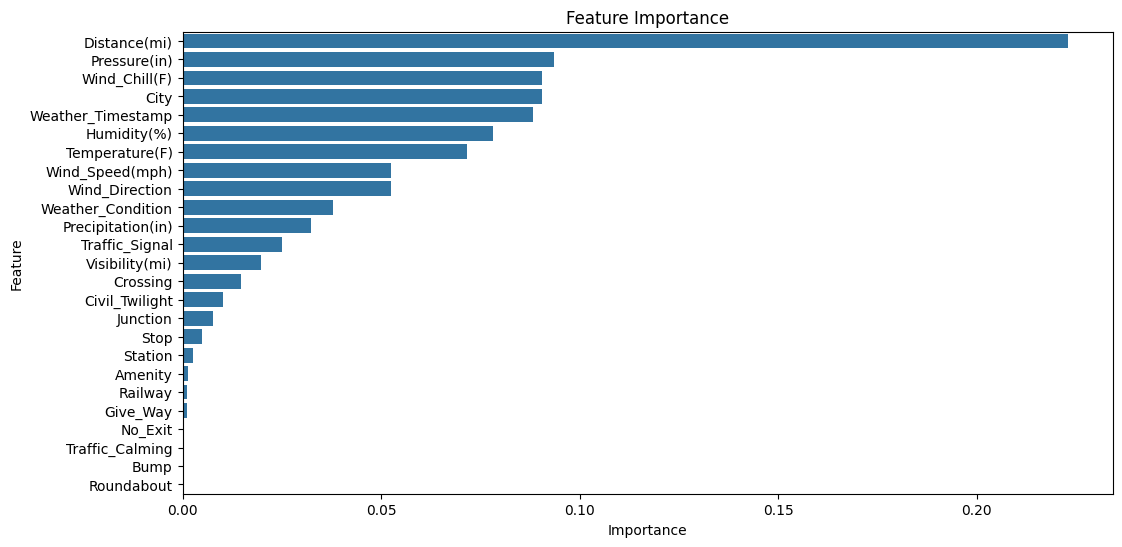

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

# Load the dataset
# Replace 'accident_data.csv' with your actual dataset file path

# Display the first few rows of the dataset to understand its structure
print(new_df.head())

# Preprocess the data (handle missing values, encode categorical variables, etc.)
# Assume 'target' is the column we want to predict
X = new_df.drop('Severity', axis=1)  # Features
y = new_df['Severity']               # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame to hold feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort features by their importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_df)

# Plot the feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


In [ ]:
'''new_df.drop(['Calculation1','Count of accidents','count of county','count Traffic Signal','Count of Crossing','Number of Records','count of Bump','Records'],axis=1, inplace=True)

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528268 entries, 0 to 528267
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Distance(mi)       528268 non-null  float64
 1   City               528268 non-null  int64  
 2   Airport_Code       528268 non-null  int64  
 3   Weather_Timestamp  528268 non-null  int64  
 4   Temperature(F)     528268 non-null  float64
 5   Wind_Chill(F)      528268 non-null  float64
 6   Humidity(%)        528268 non-null  float64
 7   Pressure(in)       528268 non-null  float64
 8   Visibility(mi)     528268 non-null  float64
 9   Wind_Direction     528268 non-null  int64  
 10  Wind_Speed(mph)    528268 non-null  float64
 11  Precipitation(in)  528268 non-null  float64
 12  Weather_Condition  528268 non-null  int64  
 13  Amenity            528268 non-null  int64  
 14  Bump               528268 non-null  int64  
 15  Crossing           528268 non-null  int64  
 16  Gi

In [ ]:
new_df.to_csv("numericalDF.csv")